In [72]:
#D11-1
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [73]:
dir_path='./Data/'
f_path=os.path.join(dir_path,'application_train.csv')
print(f_path)

./Data/application_train.csv


In [74]:
app_train=pd.read_csv(f_path)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
app_train['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

Before replace NAs, numbers of row that AMT_ANNUITY is NAs: 12


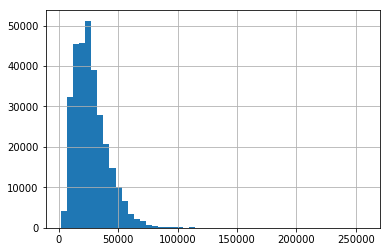

In [76]:
all_num=pd.Series(np.linspace(0,100,101))
i=0
q_all=[np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'],q=i) for i in all_num]

pd.DataFrame({'q':list(range(101)),'value':q_all})

print('Before replace NAs, numbers of row that AMT_ANNUITY is NAs: %i' % sum(app_train['AMT_ANNUITY'].isnull()))

app_train['AMT_ANNUITY'].hist(bins=50)
plt.show()

In [77]:
print(q_all[50])

24903.0


After replace NAs, numbers of row that AMT_ANNUITY is NAs: 0


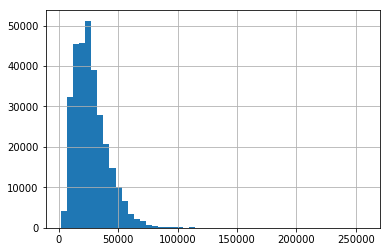

In [78]:
q_50=q_all[50]
app_train.loc[app_train['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=q_50
print('After replace NAs, numbers of row that AMT_ANNUITY is NAs: %i' %sum(app_train['AMT_ANNUITY'].isnull()))

app_train['AMT_ANNUITY'].hist(bins=50)
plt.show()

==Original data range==
count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


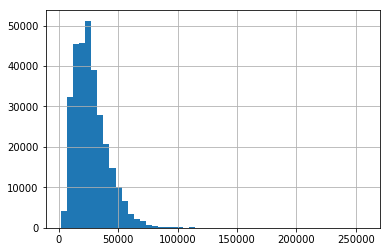

==Normalized data range==
count    307511.000000
mean         -0.801154
std           0.113049
min          -1.000000
25%          -0.883714
50%          -0.818357
75%          -0.742752
max           1.000000
Name: AMT_ANNUITY_NORMALIZED, dtype: float64


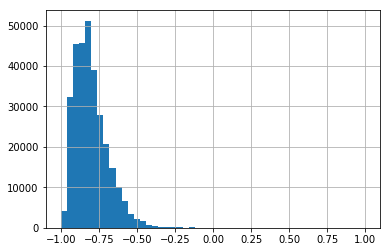

In [79]:
#D11-2
print('==Original data range==')
print(app_train['AMT_ANNUITY'].describe())

app_train['AMT_ANNUITY'].hist(bins=50)
plt.show()

def normalize_value(x):
    x=2*(((x-min(x))/(max(x)-min(x)))-0.5)
    return x

app_train['AMT_ANNUITY_NORMALIZED']=normalize_value(app_train['AMT_ANNUITY'])

print('==Normalized data range==')
print(app_train['AMT_ANNUITY_NORMALIZED'].describe())

app_train['AMT_ANNUITY_NORMALIZED'].hist(bins=50)
plt.show()

Before replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: 278


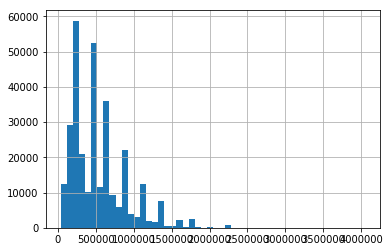

In [88]:
#D11-3
print('Before replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: %i' % sum(app_train['AMT_GOODS_PRICE'].isnull()))
app_train['AMT_GOODS_PRICE'].hist(bins=50)
plt.show()

In [113]:
import statistics
from statistics import mode

def most_frequent(List):
    return mode(List)

g_price=app_train[~app_train['AMT_GOODS_PRICE'].isnull()]['AMT_GOODS_PRICE']

value_most=most_frequent(g_price)

print(value_most)

450000.0


After replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: 0


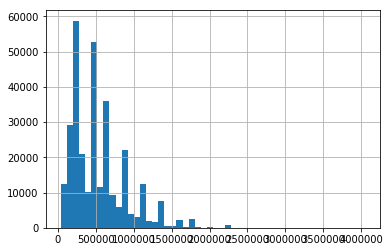

In [114]:
mode_goods_price=list(app_train['AMT_GOODS_PRICE'].value_counts().index)
app_train.loc[app_train['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']=mode_goods_price[0]

print('After replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: %i' % sum(app_train['AMT_GOODS_PRICE'].isnull()))
app_train['AMT_GOODS_PRICE'].hist(bins=50)
plt.show()